# Data cleaning
(in colaboration with Joffrey Bienvenu)

#### Ici nous avons un dataset déjà trié par un collègue. Mon but ici est juste de repasser dessus pour qu'il corresponde à mes attentes

In [1]:
# importation des libs/datasets...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/immoCollect52b.csv', index_col=0)
df

,postal_code,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,...,locality,province,region,head_city,CD_REFNIS,living_surface_ha,population,pop_per_km2,total_per_build_km2,ratio_free_build
5,1650,0,525000,4,220,1,1,1,1,1600.0,...,Beersel,Brabant flamand (le),Région flamande,Hal-Vilvorde,23003.0,693.7091,25343.0,833.694047,0.000438,-2.851322
18,7850,0,550000,4,276,1,0,1,1,1182.0,...,Enghien,Hainaut (le),Région wallonne,Ath,51067.0,423.2891,14061.0,356.848789,0.000931,-2.097867
19,4020,0,85000,2,110,1,0,0,0,237.0,...,Liège,Liège,Région wallonne,Liège,62063.0,1532.7558,197217.0,2876.075706,0.000447,-2.830605
21,1700,0,525000,4,260,1,0,1,1,1540.0,...,Dilbeek,Brabant flamand (le),Région flamande,Hal-Vilvorde,23016.0,957.6382,43423.0,1046.977241,0.000433,-2.863048
22,4000,0,150000,4,247,1,0,1,0,227.0,...,Liège,Liège,Région wallonne,Liège,62063.0,1532.7558,197217.0,2876.075706,0.000447,-2.830605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53246,3210,0,495000,4,231,0,0,1,0,374.0,...,Lubbeek,Brabant flamand (le),Région flamande,Leuven,24066.0,715.4773,14556.0,321.529874,0.000633,-2.483942
53253,2310,0,468000,3,180,1,0,0,0,0.0,...,Rijkevorsel,Antwerpen,Région flamande,Turnhout,13037.0,415.1524,12178.0,259.951211,0.001128,-1.905413
53258,1800,0,454993,3,169,0,0,0,0,389.0,...,Vilvoorde,Brabant flamand (le),Région flamande,Hal-Vilvorde,23088.0,395.8822,45495.0,2108.840342,0.000545,-2.633313
53260,3530,0,475000,3,222,0,0,0,0,1124.0,...,Houthalen-Helchteren,Limbourg (le),Région flamande,Maaseik,72039.0,938.5960,30550.0,390.640767,0.000833,-2.208714


In [2]:
df.isna().sum()

postal_code                   0
type_of_property              0
price                         0
number_of_rooms               0
house_area                    0
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
garden                        0
surface_of_the_land       17410
number_of_facades             0
swimming_pool                 0
state_of_the_building         0
longitude                     0
latitude                      0
locality_km2                  0
locality                      0
province                      0
region                        0
head_city                     0
CD_REFNIS                     0
living_surface_ha             0
population                    0
pop_per_km2                   0
total_per_build_km2           0
ratio_free_build              0
dtype: int64

In [3]:
# 17k na from surface_of_the_land, i drop the collumn
df.drop(columns=['surface_of_the_land'],inplace=True)
# df.isna().sum()
df.shape

(32784, 25)

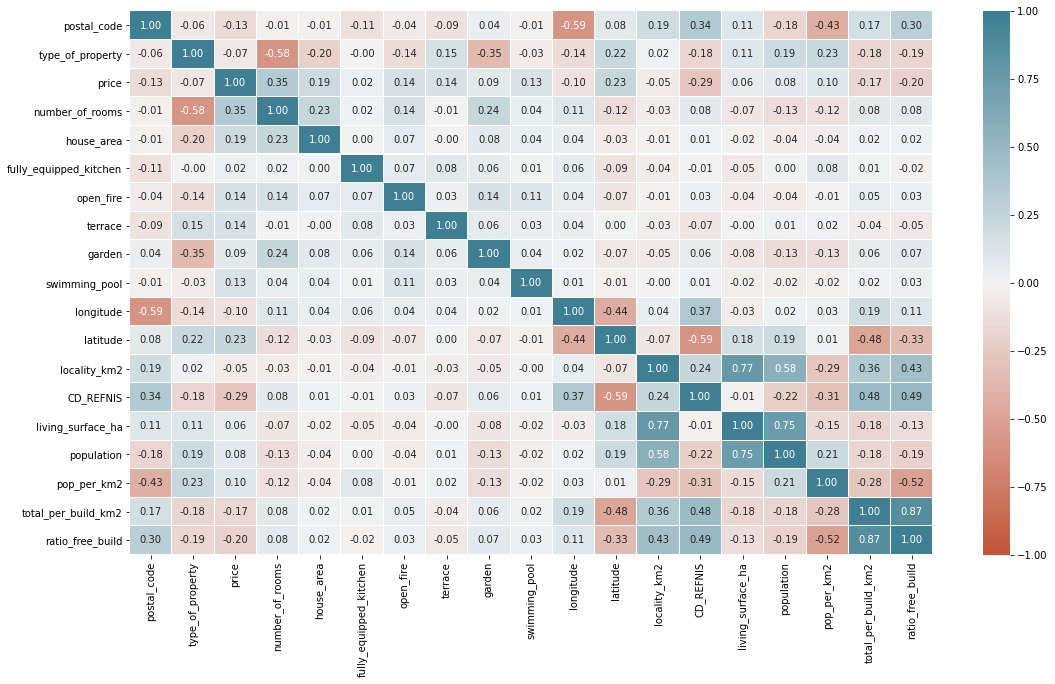

In [4]:
# Print the heatmap
plt.subplots(figsize=(18, 10))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [5]:
df.dtypes

postal_code                 int64
type_of_property            int64
price                       int64
number_of_rooms             int64
house_area                  int64
fully_equipped_kitchen      int64
open_fire                   int64
terrace                     int64
garden                      int64
number_of_facades          object
swimming_pool               int64
state_of_the_building      object
longitude                 float64
latitude                  float64
locality_km2              float64
locality                   object
province                   object
region                     object
head_city                  object
CD_REFNIS                 float64
living_surface_ha         float64
population                float64
pop_per_km2               float64
total_per_build_km2       float64
ratio_free_build          float64
dtype: object

#### Let's cleaning this for my model prediction !

In [6]:
for columnName in df.keys():
    print(df[columnName].value_counts())

8300    752
8400    687
9000    649
1180    502
8370    460
       ... 
4770      2
3665      2
3050      1
3717      1
3381      1
Name: postal_code, Length: 580, dtype: int64
1    17410
0    15374
Name: type_of_property, dtype: int64
199000    463
249000    460
299000    446
275000    439
295000    429
         ... 
344410      1
496000      1
709000      1
307620      1
282650      1
Name: price, Length: 3127, dtype: int64
2    12396
3    11592
4     4912
1     3884
Name: number_of_rooms, dtype: int64
90     765
100    734
120    709
150    678
80     631
      ... 
493      1
13       1
780      1
748      1
431      1
Name: house_area, Length: 531, dtype: int64
1    22498
0    10286
Name: fully_equipped_kitchen, dtype: int64
0    31368
1     1416
Name: open_fire, dtype: int64
1    20378
0    12406
Name: terrace, dtype: int64
0    22982
1     9802
Name: garden, dtype: int64
2       11962
None     9164
3        5734
4        5593
1         331
Name: number_of_facades, dtype: int64
0

In [7]:
# suppression des collonnes inutiles/ contenant trop de valeurs manquantes
df.drop(columns=['open_fire'],inplace=True)
df.drop(columns=['number_of_facades'],inplace=True)
df.drop(columns=['swimming_pool'],inplace=True)
# df.drop(columns=['state_of_the_building'],inplace=True)


(32784, 22)

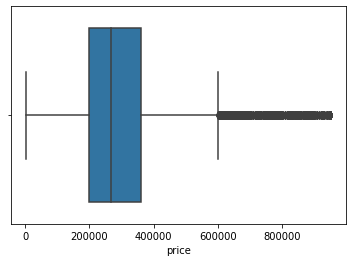

In [8]:
sns.boxplot(x=df['price'])
df.shape

(31257, 22)

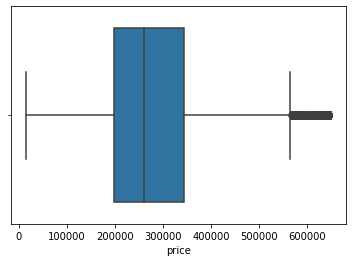

In [9]:
df = df[(df['price'] < 650000) & (df['price'] > 10000)]
sns.boxplot(x=df['price'])
df.shape

In [10]:
df['number_of_rooms'].value_counts()

2    12100
3    10919
4     4373
1     3865
Name: number_of_rooms, dtype: int64

<AxesSubplot:xlabel='house_area'>

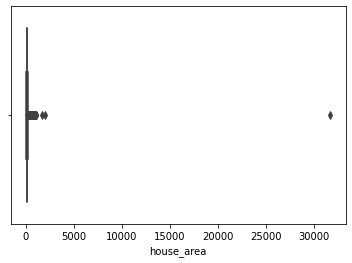

In [11]:
sns.boxplot(x=df['house_area'])

<AxesSubplot:xlabel='house_area'>

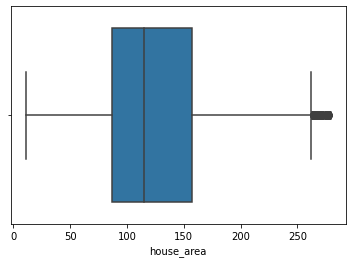

In [12]:
df = df[(df['house_area'] < 280) & (df['house_area'] > 10)]
sns.boxplot(x=df['house_area'])

In [13]:
print(df['state_of_the_building'].value_counts())
print(df.shape)
df = df[df['state_of_the_building'] != "to restore"]
print(df.shape)

def is_new(element):
    if element == "as new":
        element = 1
        return element
    else: 
        element = 0
        return element
    

as new            9575
good              7870
None              7655
to be done up     1913
to renovate       1654
just renovated    1527
to restore          90
Name: state_of_the_building, dtype: int64
(30284, 22)
(30194, 22)


In [14]:
df['state_of_the_building'] = df['state_of_the_building'].apply(is_new)
df['state_of_the_building'].value_counts()

0    20619
1     9575
Name: state_of_the_building, dtype: int64

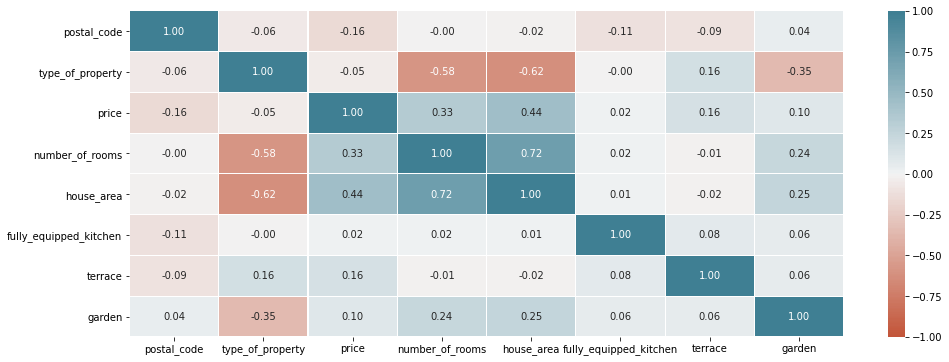

In [15]:
# Print the heatmap
df_util = df.iloc[:,0:8]
plt.subplots(figsize=(16, 6))   
sns.heatmap(df_util.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()